# Performance Analysis - MetroInd 2024

The aim of this Jupyter notebook is to conduct performance analyses based on vehicular data obtained from simulations carried out in SUMO, which were subsequently collected, pre-processed, and analyzed by a connected vehicle architecture. The purpose is to gain insights into the amount of collected data, the variety of vehicles generated in the simulation, the simulation duration, data transfer rate, and data reliability, as well as attempting to plot the complete route of each vehicle, among other analyses.

## Installing Libraries

In [1]:
!pip install pandas
!pip install folium
!pip install branca
!pip install matplotlib
!pip install seaborn
!pip install --upgrade nbformat


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/b0/4c/20b6c8b6d7cc17b0481eb49c18f23b76f913ab3e6580a57515cd9727ca43/nbformat-5.10.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/78.4 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/78.4 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.4 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 78.4/78.4 kB 863.3 kB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries

In [2]:
import folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Data Acquisition

In [4]:
df1 = pd.read_csv('newdata_sim1.csv')
df1 = df1.sort_values(by='timestamp_sumo')

df2 = pd.read_csv('newdata_sim2.csv')
df2 = df2.sort_values(by='timestamp_sumo')

df3 = pd.read_csv('newdata_sim3.csv')
df3 = df3.sort_values(by='timestamp_sumo')
df3.drop(columns=['Unnamed: 0'], inplace=True)

df = pd.concat([df1, df2, df3], ignore_index=True)

df.head()

,co2_emission,eletri_consumption,noise_emission,longitude,simulation_time,timestamp_sumo,acceleration,vehid,distance_odometer,fuel_consumption,latitude,speed,preprocessing_time
0,2416.07,0.0,65.15,-35.272150,1,2024-03-07T12:25:25.826588,0.0,veh0_4,0.0,770.63,-5.711407,14.72,2024-03-07T12:25:25.869000
1,2624.72,0.0,55.94,-35.239297,1,2024-03-07T12:25:25.835790,0.0,veh1_4,0.0,837.22,-5.737361,0.00,2024-03-07T12:25:25.875000
2,2349.93,0.0,64.67,-35.260363,1,2024-03-07T12:25:25.840364,0.0,veh2_4,0.0,749.53,-5.888419,14.03,2024-03-07T12:25:25.881000
3,2232.06,0.0,63.61,-35.238825,1,2024-03-07T12:25:25.846769,0.0,veh3_4,0.0,711.94,-5.725048,12.54,2024-03-07T12:25:25.885000
4,2375.57,0.0,64.86,-35.264587,1,2024-03-07T12:25:25.850471,0.0,veh4_4,0.0,757.71,-5.849688,14.31,2024-03-07T12:25:25.891000


## Data Information

### Amount of data and number of vehicles

In [5]:
print(f'Were collected {df1.shape[0]} rows and {df1.shape[1]} columns of data in simulation 1')
print(f'Were collected {df2.shape[0]} rows and {df2.shape[1]} columns of data in simulation 2')
print(f'Were collected {df3.shape[0]} rows and {df3.shape[1]} columns of data in simulation 3')
print(f'Were collected {df.shape[0]} rows and {df.shape[1]} columns of data in general')

qtd_vehicles = len(df1['vehid'].unique())
print(f'Were used {qtd_vehicles} different vehicles in each simulation')

Were collected 1212996 rows and 13 columns of data in simulation 1
Were collected 1212996 rows and 13 columns of data in simulation 2
Were collected 1212996 rows and 13 columns of data in simulation 3
Were collected 3638988 rows and 13 columns of data in general
Were used 91296 different vehicles in each simulation


### Types of information collected

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638988 entries, 0 to 3638987
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   co2_emission        float64
 1   eletri_consumption  float64
 2   noise_emission      float64
 3   longitude           float64
 4   simulation_time     int64  
 5   timestamp_sumo      object 
 6   acceleration        float64
 7   vehid               object 
 8   distance_odometer   float64
 9   fuel_consumption    float64
 10  latitude            float64
 11  speed               float64
 12  preprocessing_time  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 360.9+ MB


## Data Analysis

### Transfer Rate - Information

In [7]:
dfs = [df1, df2, df2]

for index, data in enumerate(dfs):
    first = data.loc[0, 'timestamp_sumo']
    first_formatted = datetime.strptime(first, "%Y-%m-%dT%H:%M:%S.%f").strftime("%d/%m/%Y %H:%M:%S")
    last = data.loc[data.shape[0]-1, 'timestamp_sumo']
    last_formatted = datetime.strptime(last, "%Y-%m-%dT%H:%M:%S.%f").strftime("%d/%m/%Y %H:%M:%S")

    print(f'Simulation {index+1} start: {first_formatted}')
    print(f'Simulation {index+1} end: {last_formatted}')


Simulation 1 start: 07/03/2024 12:25:25
Simulation 1 end: 07/03/2024 13:32:29
Simulation 2 start: 07/03/2024 13:53:46
Simulation 2 end: 07/03/2024 15:03:30
Simulation 3 start: 07/03/2024 13:53:46
Simulation 3 end: 07/03/2024 15:03:30


In [8]:
for index, data in enumerate(dfs):
    first_time = datetime.strptime(data.loc[0, 'timestamp_sumo'], '%Y-%m-%dT%H:%M:%S.%f')
    last_time = datetime.strptime(data.loc[data.shape[0]-1, 'timestamp_sumo'], '%Y-%m-%dT%H:%M:%S.%f')

    time_elapsed = (last_time - first_time).total_seconds()
    print(f'{index+1}: Simulation time in seconds: {time_elapsed}')

    total_time = timedelta(seconds=int(time_elapsed))
    print(f'{index+1}: Simulation time (hh:mm:ss): {total_time}')

    data_per_second = round(data.shape[0]/time_elapsed, 3)
    print(f'{index+1}: Data transfer rate per second (average): {data_per_second}')

1: Simulation time in seconds: 4023.776063
1: Simulation time (hh:mm:ss): 1:07:03
1: Data transfer rate per second (average): 301.457
2: Simulation time in seconds: 4184.806861
2: Simulation time (hh:mm:ss): 1:09:44
2: Data transfer rate per second (average): 289.857
3: Simulation time in seconds: 4184.806861
3: Simulation time (hh:mm:ss): 1:09:44
3: Data transfer rate per second (average): 289.857


### Transfer Rate - Graph

In [9]:
df['timestamp_sumo'] = pd.to_datetime(df['timestamp_sumo'])
df['timestamp_sumo_no_mili'] = df['timestamp_sumo'].dt.strftime('%Y-%m-%dT%H:%M:%S.%f')
df_taxa = df.value_counts('timestamp_sumo_no_mili')
df_taxa

ValueError: time data "2024-03-07T14:56:42" doesn't match format "%Y-%m-%dT%H:%M:%S.%f", at position 2336808. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df_taxa = df_taxa.sort_index()
df_taxa

timestamp_sumo_no_mili
2024-03-07T12:25:25      6
2024-03-07T12:25:26     12
2024-03-07T12:25:29      6
2024-03-07T12:26:54    149
2024-03-07T12:26:55    318
                      ... 
2024-03-07T18:03:31     99
2024-03-07T18:03:32    103
2024-03-07T18:03:33    113
2024-03-07T18:03:34     94
2024-03-07T18:03:35     18
Length: 11149, dtype: int64

In [ ]:
df_hist_taxa = pd.DataFrame(df_taxa)
df_hist_taxa.reset_index(inplace=True)
df_hist_taxa.rename(columns={0: 'Count'}, inplace=True)
df_hist_taxa

,timestamp_sumo_no_mili,Count
0,2024-03-07T12:25:25,6
1,2024-03-07T12:25:26,12
2,2024-03-07T12:25:29,6
3,2024-03-07T12:26:54,149
4,2024-03-07T12:26:55,318
...,...,...
11144,2024-03-07T18:03:31,99
11145,2024-03-07T18:03:32,103
11146,2024-03-07T18:03:33,113
11147,2024-03-07T18:03:34,94


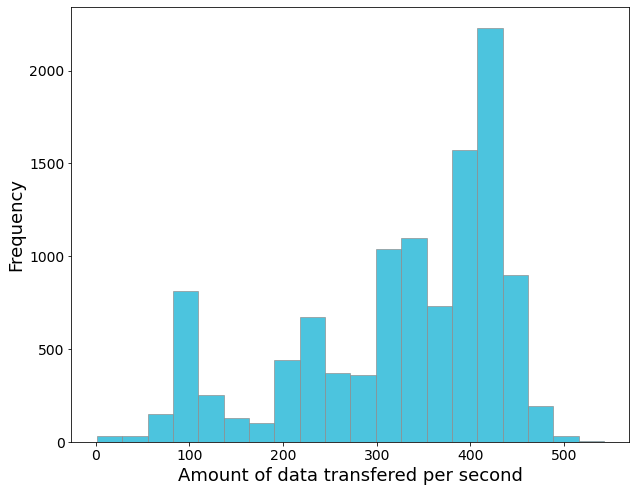

In [ ]:
plt.figure(figsize=(10, 8))  
plt.hist(df_hist_taxa['Count'], bins=20, color='#00abd0', edgecolor='#929292', alpha=0.7)

plt.xlabel('Amount of data transfered per second', fontsize=18) 
plt.ylabel('Frequency', fontsize=18) 

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)  

plt.savefig('transfer-rate-graph.png', dpi=300)
plt.show()

### Latency - Graph

In [ ]:
df['dt_preprocessing_time'] = pd.to_datetime(df['preprocessing_time'])
df['dt_timestamp_sumo'] = pd.to_datetime(df['timestamp_sumo'])
df['latency'] = df['dt_preprocessing_time'] - df['dt_timestamp_sumo']
df['latency'] = df['latency'].dt.total_seconds() * 1000 # Latency in milisseconds

df['latency']

0           42.412
1           39.210
2           40.636
3           38.231
4           40.529
            ...   
3638983    261.577
3638984    262.106
3638985    264.446
3638986    262.286
3638987    261.926
Name: latency, Length: 3638988, dtype: float64

In [ ]:
len(df[df['latency'] > 1000])

303296

In [ ]:
latency_mean = round(df['latency'].mean(), 2)
latency_median = round(df['latency'].median(), 2)
print(f'Mean latency: {latency_mean}')
print(f'Median latency: {latency_median}')

Mean latency: 399.31
Median latency: 190.13


In [ ]:
def organize_latency_groups(latency):
    if latency < 100:
        return '0-100'
    elif latency < 200:
        return '100-200'
    elif latency < 300:
        return '200-300'
    elif latency < 400:
        return '300-400'
    elif latency < 500:
        return '400-500'
    else:
        return '500+'

df['latency_group'] = df['latency'].apply(organize_latency_groups)
df[['latency', 'latency_group']]

,latency,latency_group
0,42.412,0-100
1,39.210,0-100
2,40.636,0-100
3,38.231,0-100
4,40.529,0-100
...,...,...
3638983,261.577,200-300
3638984,262.106,200-300
3638985,264.446,200-300
3638986,262.286,200-300


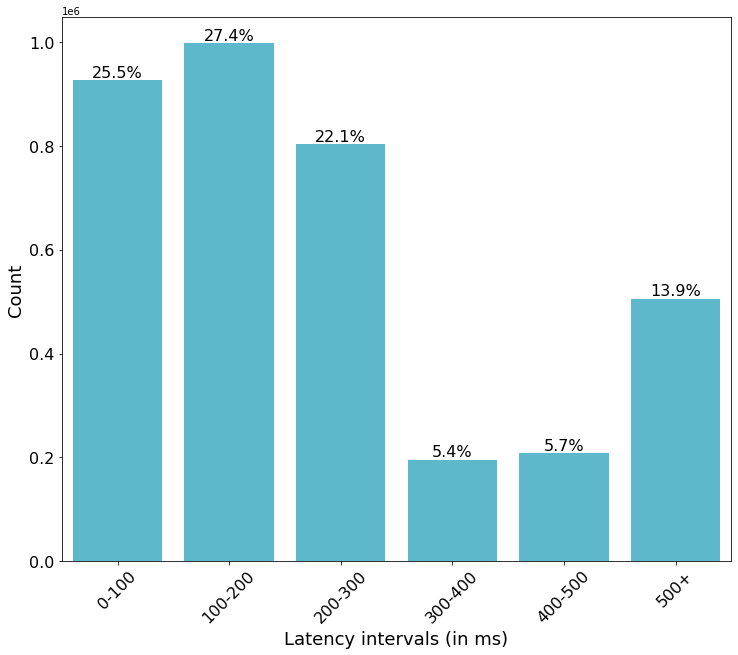

In [ ]:
order = ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']

plt.figure(figsize=(12, 10))

ax = sns.countplot(x="latency_group", palette=["#00abd0"], order=order, data=df, alpha=0.7)

total = float(len(df["latency_group"]))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,
            '{:.1f}%'.format((height / total) * 100),
            ha="center", va="bottom", fontsize=16)

plt.xticks(rotation=45, fontsize=16)  
plt.yticks(fontsize=16)  
plt.xlabel('Latency intervals (in ms)', fontsize=18) 
plt.ylabel('Count', fontsize=18) 
plt.savefig('latency-graph.png', dpi=300)
plt.show()


### Data reliability - Route of one vehicle

In [ ]:
df_example_trip = df1[df1.vehid == 'veh150_1']
df_example_trip

,co2_emission,eletri_consumption,noise_emission,longitude,simulation_time,timestamp_sumo,acceleration,vehid,distance_odometer,fuel_consumption,latitude,speed,preprocessing_time
1034,2265.11,0.0,63.95,-35.211856,2,2024-03-07T12:26:57.665108,0.00,veh150_1,0.00,722.48,-5.741109,13.01,2024-03-07T12:26:57.691000
5739,0.00,0.0,61.46,-35.211950,3,2024-03-07T12:27:53.708079,-0.89,veh150_1,12.12,0.00,-5.741052,12.12,2024-03-07T12:27:53.738000
14686,4853.92,0.0,66.07,-35.212049,4,2024-03-07T12:28:56.952171,0.77,veh150_1,25.01,1548.17,-5.740991,12.89,2024-03-07T12:28:56.982000
28382,0.00,0.0,62.85,-35.212145,5,2024-03-07T12:30:11.631507,-0.33,veh150_1,37.57,0.00,-5.740931,12.56,2024-03-07T12:30:11.662000
47965,0.00,0.0,58.52,-35.212225,6,2024-03-07T12:31:42.468219,-2.04,veh150_1,48.08,0.00,-5.740879,10.51,2024-03-07T12:31:42.497000
69789,0.00,0.0,52.36,-35.212276,7,2024-03-07T12:33:19.219001,-3.75,veh150_1,54.84,0.00,-5.740847,6.76,2024-03-07T12:33:19.252000
97046,0.00,0.0,57.40,-35.212330,8,2024-03-07T12:35:06.487853,-0.49,veh150_1,61.12,0.00,-5.740834,6.27,2024-03-07T12:35:06.522000
128335,1864.00,0.0,58.44,-35.212368,9,2024-03-07T12:37:05.455993,-0.16,veh150_1,67.23,594.56,-5.740871,6.11,2024-03-07T12:37:05.490000
165492,3962.60,0.0,63.57,-35.212394,10,2024-03-07T12:39:18.044075,1.00,veh150_1,74.34,1263.90,-5.740930,7.11,2024-03-07T12:39:18.081000
210086,7037.61,0.0,68.98,-35.212429,11,2024-03-07T12:41:44.852200,2.07,veh150_1,83.52,2244.66,-5.741005,9.18,2024-03-07T12:41:44.891000


In [ ]:
def route_graph(data):
    lat = data['latitude']
    lon = data['longitude']

    points = list(zip(lat, lon))
    route_map = folium.Map(location=points[int(len(points)/2)], zoom_start=13)
    polilyne = folium.PolyLine(points, color='red').add_to(route_map)

    points_speed = polilyne.locations
    cor = '#00abd0'

    for i, point in enumerate(points_speed):
        if i > 0:
            folium.PolyLine(locations=[points_speed[i-1], point], weight=5, color=cor).add_to(route_map)

    start_trip = [points[0][0], points[0][1]]
    final_trip = [points[-1][0], points[-1][1]]

    icon_start_trip = folium.Marker(location=start_trip,
                                    popup=folium.Popup('<h3> Start </h3>'),
                                    icon=folium.Icon(color='green', prefix='fa', icon='fa-solid fa-flag-checkered'))

    icon_final_trip = folium.Marker(location=final_trip,
                                    popup=folium.Popup('<h3> End </h3>'),
                                    icon=folium.Icon(color='red', prefix='fa', icon='fa-solid fa-flag-checkered'))

    icon_start_trip.add_to(route_map)
    icon_final_trip.add_to(route_map)

    return route_map

In [ ]:
map = route_graph(df_example_trip)

map